In [52]:
import numpy as np
import matplotlib.pyplot as plt
from subprocess import Popen, PIPE

In [68]:

def run_simulation(modified, L, drops, runs):
    params = [modified, str(L), str(drops), str(runs)]
    params = "\n".join(params)

    with Popen("./RD_hw", stdin = PIPE, stdout = PIPE) as run:
        run.communicate(params.encode())

    result = np.loadtxt("modified_w_average" + str(L) + ".txt")
    plt.loglog(result[:,0], result[:,1])

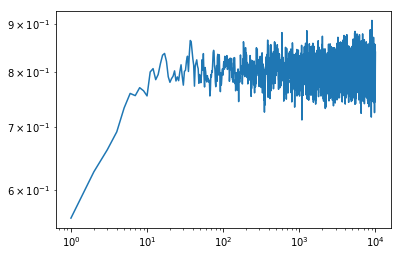

In [70]:
modified = "true"
L = 10
drops = 10000
runs = 100

run_simulation(modified, L, drops, runs)

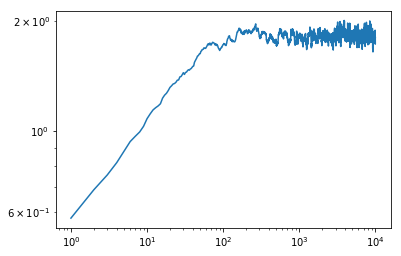

In [71]:
modified = "true"
L = 50
drops = 10000
runs = 100

run_simulation(modified, L, drops, runs)

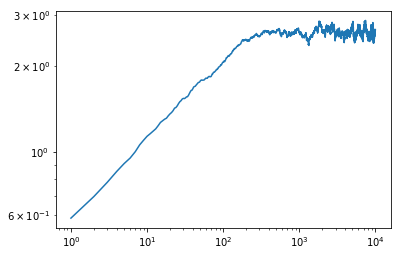

In [72]:
modified = "true"
L = 100
drops = 10000
runs = 100

run_simulation(modified, L, drops, runs)

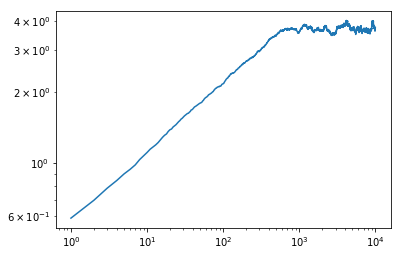

In [73]:
modified = "true"
L = 200
drops = 10000
runs = 100

run_simulation(modified, L, drops, runs)

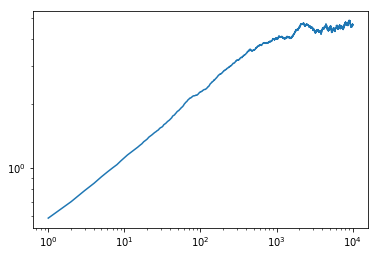

In [74]:
modified = "true"
L = 300
drops = 10000
runs = 100

run_simulation(modified, L, drops, runs)

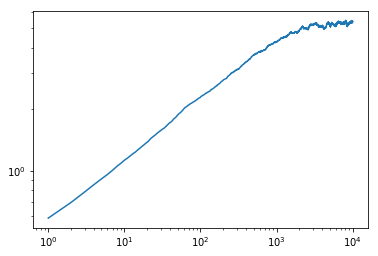

In [75]:
modified = "true"
L = 400
drops = 10000
runs = 100

run_simulation(modified, L, drops, runs)

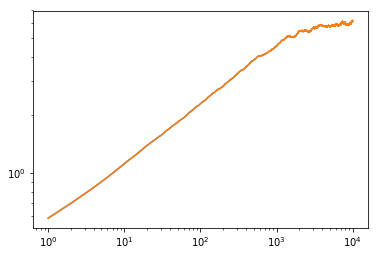

In [77]:
modified = "true"
L = 500
drops = 10000
runs = 100

run_simulation(modified, L, drops, runs)
run_simulation("false", L, drops, runs)

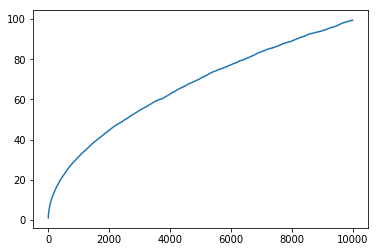

In [50]:
plt.plot(normal[:,0], normal[:,1])

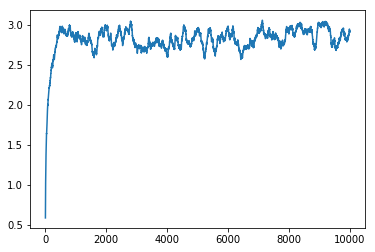

In [51]:
plt.plot(modified[:,0], modified[:,1])

10
20
30
50
70
100
150
200
300
400
500


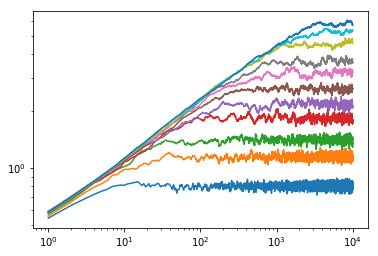

In [78]:
ls = [10, 20, 30, 50, 70, 100, 150, 200, 300, 400, 500]
for i in ls:
    print(i)
    run_simulation("true", i, drops, runs)

In [82]:
file_names = ["modified_w_average" + str(i) + ".txt" for i in ls]
file_names 

['modified_w_average10.txt',
 'modified_w_average20.txt',
 'modified_w_average30.txt',
 'modified_w_average50.txt',
 'modified_w_average70.txt',
 'modified_w_average100.txt',
 'modified_w_average150.txt',
 'modified_w_average200.txt',
 'modified_w_average300.txt',
 'modified_w_average400.txt',
 'modified_w_average500.txt']

In [84]:
data = [np.loadtxt("modified_w_average" + str(i) + ".txt") for i in ls]

In [89]:
data = np.array(data)
data.shape

(11, 10000, 2)

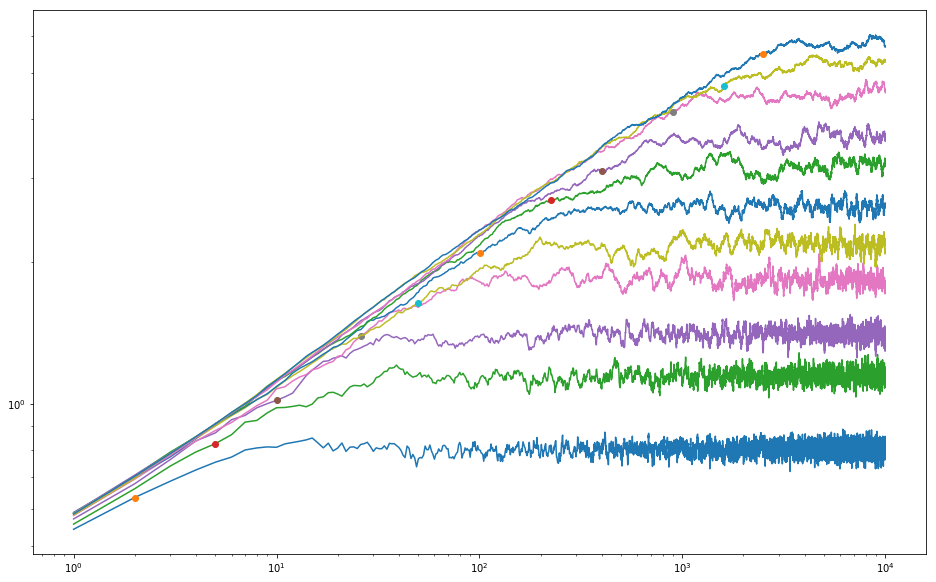

In [135]:
plt.figure(1, (16, 10))
for i in range(0, data.shape[0]):
    plt.loglog(data[i, :, 0], data[i, :, 1])
    plt.loglog(data[i,np.floor(ls[i]**2 / 100).astype(int), 0], data[i, np.floor(ls[i]**2 / 100).astype(int), 1], marker = "o")

In [192]:
xs = []
ys = []

for i in range(0, len(ls)):
    xs.append(np.log10(data[i, :ls[i] / 2, 0]))
    ys.append(np.log10(data[i, :ls[i] / 2, 1]))
    

In [193]:
xs = np.hstack(xs)
ys = np.hstack(ys)

In [194]:
fit = np.polyfit(xs, ys, 1)

In [195]:
tbeta_x = np.linspace(1, 10000, 10000)
tbeta = tbeta_x**fit[0]

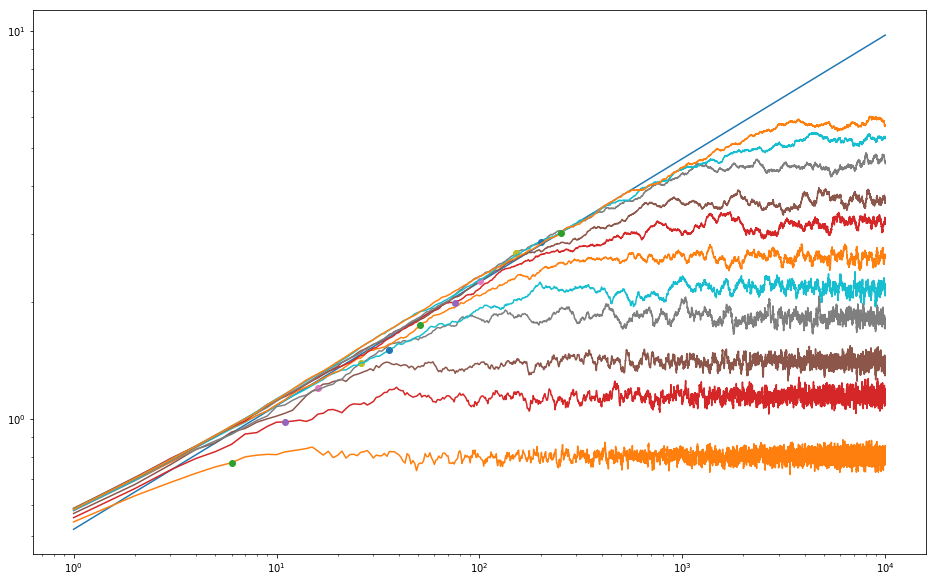

In [199]:
plt.figure(1, (16, 10))
plt.loglog(tbeta_x, tbeta * 10**fit[1])
for i in range(0, data.shape[0]):
    plt.loglog(data[i, :, 0], data[i, :, 1])
    plt.loglog(data[i,int(ls[i] / 2), 0], data[i, int(ls[i] / 2), 1], marker = "o")

In [219]:
Ls = np.mean(data[:,-5000:,1], 1)

In [220]:
Ls

array([0.80503015, 1.14861661, 1.40805568, 1.82921452, 2.16795805,
       2.61150088, 3.22021454, 3.68901455, 4.54730557, 5.24374063,
       5.78905322])

In [221]:
Ls.shape

(11,)

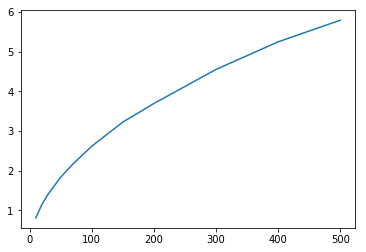

In [222]:
plt.plot(ls, Ls)

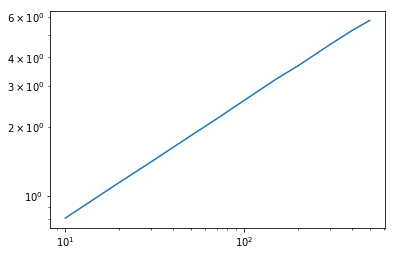

In [223]:
plt.loglog(ls, Ls)

In [232]:
L_fit = np.polyfit(np.log10(ls), np.log10(Ls), 1)

In [233]:
L_fit

array([ 0.50659604, -0.59876918])

In [217]:
L = np.linspace(10, 500, 100)
Lalfa = L**L_fit[0] * 10**L_fit[1]

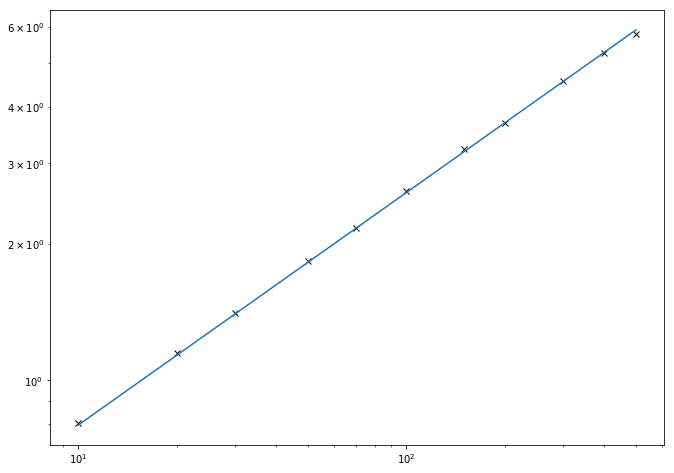

In [231]:
plt.figure(1, (11, 8))
plt.loglog(ls, Ls, marker = "x", linestyle = "None", color = "k")
plt.loglog(L, Lalfa)

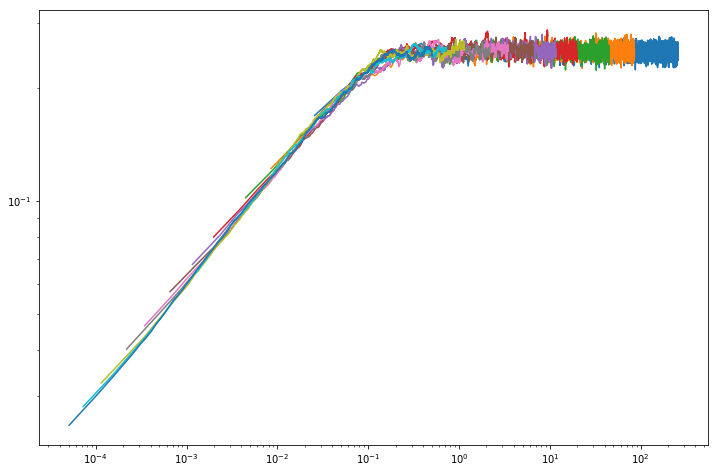

In [236]:
plt.figure(1, (12,8))

for i in range(0, len(ls)):
    plt.loglog(data[i, :, 0]  / ls[i]**(L_fit[0] / fit[0]), data[i, :, 1] / ls[i]**L_fit[0])